# Education Analysis

## Введение

#### Цель проекта

Проект направлен на изучение влияния демографических и семейных особенностей на академическую успеваемость учеников. 
Входные данные состоят практически 6000 записей студентов из двух школ Белуджистана, провинции Пакистана. Модель будет принимать информацию о различных характеристиках учеников и прогнозировать результат экзамена. В этом проекте будут использованы различные классификаторы, такие как деревья решений, логистическая регрессия, K-ближайшие соседи, случайный лес для целей классификации.

#### Имеющиеся признаки

Признак | Описание
:--------|:---------
Gender Code| 0 - женский пол, 1 - мужской
IntBrothers | Количество братьев 
IntSisters | Количество сестер
IntSchoolBrothers | Количество братьев, учащихся в той же школе
IntSchoolSisters | Количество сестер, учащихся в той же школе
ClassSchoolStatus | 0 или 1 в зависимости от школы (всего 2 школы)
Disability | 0 - отстутствие инвалидности, 1 - инвалидность
Lang1 | 0 - ученик говорит на этом языке, 1 - не говорит
Lang2 | 0 - ученик говорит на этом языке, 1 - не говорит
Lang3 | 0 - ученик говорит на этом языке, 1 - не говорит
Lang4 | 0 - ученик говорит на этом языке, 1 - не говорит

#### Предсказываемый признак

Признак | Описание
:--------|:---------
RESULT| FAIL - экзамен не сдан, PASS - экзамен сдан

#### Ознакомление с данными

In [108]:
# Импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None 

In [51]:
# Считаем данные
df = pd.read_excel('Data.xlsx')

# Удалим два ненужных столбца
df.drop('VchMotherTounge', axis=1, inplace =True)
df.drop('MotherTongueBin', axis=1, inplace =True)

# Переименуем столбцы для удобства
df.rename({'Disability01': 'Disability', 'RESULT': 'Result', 'GenderCode': 'Gender'}, axis=1, inplace=True)

df.head()

,Gender,IntBrothers,IntSisters,IntSchoolBrothers,IntSchoolSisters,ClassSchoolStatus,Disability,Lang1,Lang2,Lang3,Lang4,Religion,Result
0,0,3,3,3,2,1,0,1,0,0,0,1,FAIL
1,0,4,5,1,1,1,0,1,0,0,0,1,PASS
2,0,5,3,0,0,1,0,1,0,0,0,1,PASS
3,0,2,4,1,4,1,0,1,0,0,0,1,PASS
4,0,2,1,0,0,1,0,1,0,0,0,1,FAIL


In [63]:
# Посмотрим информацию о столбцах
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5609 entries, 0 to 5608
Data columns (total 13 columns):
Gender               5609 non-null int64
IntBrothers          5609 non-null int64
IntSisters           5609 non-null int64
IntSchoolBrothers    5609 non-null int64
IntSchoolSisters     5609 non-null int64
ClassSchoolStatus    5609 non-null int64
Disability           5609 non-null int64
Lang1                5609 non-null int64
Lang2                5609 non-null int64
Lang3                5609 non-null int64
Lang4                5609 non-null int64
Religion             5609 non-null int64
Result               5609 non-null object
dtypes: int64(12), object(1)
memory usage: 569.8+ KB


Обзор показал, что входной набор состоит из 5609 строк и пропущенные значения отстутствуют. Следовательно, нам не нужна предварительная обработка пропущенных значений для анализа.

## Анализ признаков

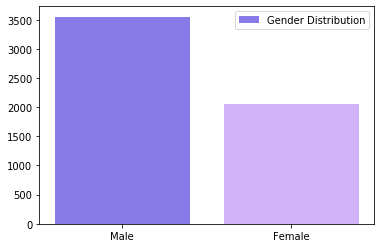

In [81]:
# Анализ по полу
female =len(df[df['Gender'] == 0])
male = len(df[df['Gender'] == 1])

x = np.array(['Male', 'Female'])
y = np.array([male, female])

colors = np.random.rand(7, 4)    # RGB
plt.bar(x, y, label = 'Gender Distribution', color = colors)
plt.legend()
plt.savefig('GenderDistribution.png')
plt.show()

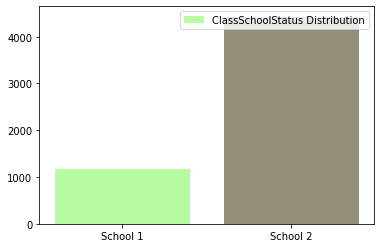

In [84]:
# Анализ по школе
sc1 = len(df[df['ClassSchoolStatus'] == 0])
sc2 = len(df[df['ClassSchoolStatus'] == 1])

x = np.array(['School 1', 'School 2'])
y = np.array([sc1, sc2])

colors = np.random.rand(7, 4)    # RGB
plt.bar(x, y, label = 'ClassSchoolStatus Distribution', color = colors)
plt.legend()
plt.savefig('ClassSchoolStatus.png')
plt.show()

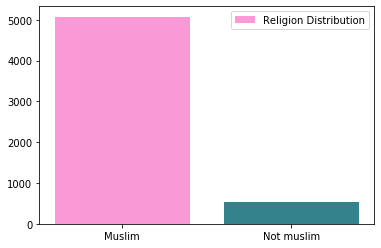

In [89]:
# Анализ по религии
not_muslim = len(df[df['Religion'] == 0])
muslim = len(df[df['Religion'] == 1])

x = np.array(['Muslim', 'Not muslim'])
y = np.array([muslim, not_muslim])

colors = np.random.rand(7, 4)    # RGB
plt.bar(x, y, label = 'Religion Distribution', color = colors)
plt.legend()
plt.savefig('Religion.png')
plt.show()

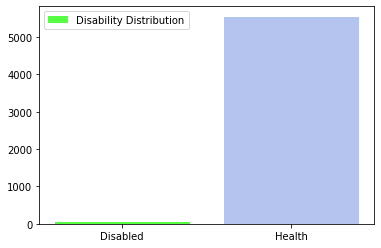

In [92]:
# Анализ по инвалидности
not_dis = len(df[df['Disability'] == 0])
dis = len(df[df['Disability'] == 1])

x = np.array(['Disabled', 'Health'])
y = np.array([dis, not_dis])

colors = np.random.rand(7, 4)    # RGB
plt.bar(x, y, label = 'Disability Distribution', color = colors)
plt.legend()
plt.savefig('Disability.png')
plt.show()

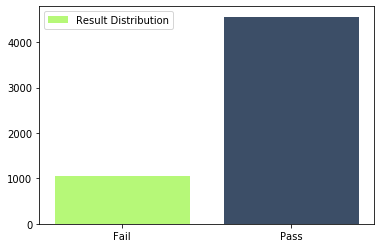

In [106]:
# Анализ по результату
failed = len(df[df['Result'] == 'FAIL'])
passed = len(df[df['Result'] == 'PASS'])

x = np.array(['Fail', 'Pass'])
y = np.array([failed, passed])

colors = np.random.rand(7, 4)    # RGB
plt.bar(x, y, label = 'Result Distribution', color = colors)
plt.legend()
plt.savefig('Result.png')
plt.show()

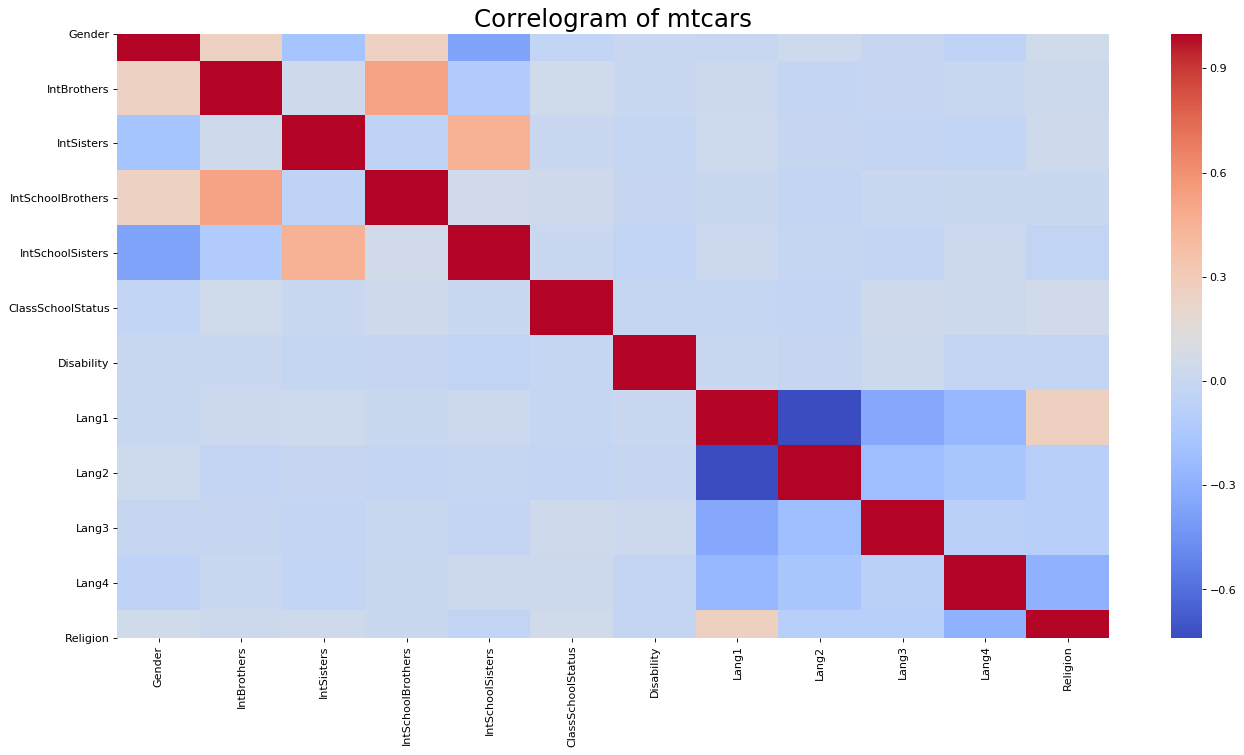

In [126]:
# Построим диаграмму корреляции
plt.figure(figsize=(20,10), dpi= 80)
plt.title('Correlogram of mtcars', fontsize=22)
sns.heatmap(df.corr(), cmap='coolwarm')

In [38]:
# Разделим данные на входные (x) и выходные (y)
X = df.iloc[:,:12]
y = df.iloc[:, 12]
# Заменим FAIL и PASS на 0 и 1 соответственно
y[y == 'PASS'] = 1
y[y == 'FAIL'] = 0
y = y.astype(int)

display(X.head())
display(y.head())

,GenderCode,IntBrothers,IntSisters,IntSchoolBrothers,IntSchoolSisters,ClassSchoolStatus,Disability01,Lang1,Lang2,Lang3,Lang4,Religion
0,0,3,3,3,2,1,0,1,0,0,0,1
1,0,4,5,1,1,1,0,1,0,0,0,1
2,0,5,3,0,0,1,0,1,0,0,0,1
3,0,2,4,1,4,1,0,1,0,0,0,1
4,0,2,1,0,0,1,0,1,0,0,0,1


0    0
1    1
2    1
3    1
4    0
Name: RESULT, dtype: int32